### Supermarket Sales Analysis

**🎯 Business Goal**

Help a supermarket owner understand sales performance and customer behaviour to improve profit.

**📜Business Questions**

Which product line sells the most (by count)?

Which product line generates the highest total revenue?

Are ratings and total purchase amount correlated?

Which city gives highest sales?

What is the average spending per customer type?

What payment method is used the most?


In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [7]:
df = pd.read_csv('Data/SuperMarket Analysis.csv')

In [8]:
df.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Sales                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [10]:
# Data's Desciption 
df.describe()

,Unit price,Quantity,Tax 5%,Sales,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [11]:
# Checking for outliers 
def check_outliers_iqr(df, col):
    Q1 = df[col].describe()['25%']
    Q3 = df[col].quantile(0.75)    ### Two different ways to get the q1 and q3
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] < lower) | (df[col] > upper)]

check_outliers_iqr(df, "gross income")

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
166,234-65-2137,Giza,Naypyitaw,Normal,Male,Home and lifestyle,95.58,10,47.790,1003.590,1/16/2019,1:32:00 PM,Cash,955.8,4.761905,47.790,4.8
167,687-47-8271,Alex,Yangon,Normal,Male,Fashion accessories,98.98,10,49.490,1039.290,2/8/2019,4:20:00 PM,Credit card,989.8,4.761905,49.490,8.7
350,860-79-0874,Giza,Naypyitaw,Member,Female,Fashion accessories,99.30,10,49.650,1042.650,2/15/2019,2:53:00 PM,Credit card,993.0,4.761905,49.650,6.6
357,554-42-2417,Giza,Naypyitaw,Normal,Female,Sports and travel,95.44,10,47.720,1002.120,1/9/2019,1:45:00 PM,Cash,954.4,4.761905,47.720,5.2
422,271-88-8734,Giza,Naypyitaw,Member,Female,Fashion accessories,97.21,10,48.605,1020.705,2/8/2019,1:00:00 PM,Credit card,972.1,4.761905,48.605,8.7
557,283-26-5248,Giza,Naypyitaw,Member,Female,Food and beverages,98.52,10,49.260,1034.460,1/30/2019,8:23:00 PM,Ewallet,985.2,4.761905,49.260,4.5
699,751-41-9720,Giza,Naypyitaw,Normal,Male,Home and lifestyle,97.50,10,48.750,1023.750,1/12/2019,4:18:00 PM,Ewallet,975.0,4.761905,48.750,8.0
792,744-16-7898,Cairo,Mandalay,Normal,Female,Home and lifestyle,97.37,10,48.685,1022.385,1/15/2019,1:48:00 PM,Credit card,973.7,4.761905,48.685,4.9
996,303-96-2227,Cairo,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.690,1022.490,3/2/2019,5:16:00 PM,Ewallet,973.8,4.761905,48.690,4.4


In [12]:
# CHeking for Null Values
df.isnull().sum()

# df.isnull().values.any() # Check and return true(at least one null) or false(no null)


Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Sales                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [13]:
# Cheking for duplicates
df.duplicated().sum() 

np.int64(0)

📜Exploration Summary:

* We have a dataframe consisting of 1000 rows and 17 columns.
* Data looks bit tidy(Clean) with no NaNs nor  Duplicate Values.
* There are noticable Outliers in the 'Tax5%','Sales','Cogs' and 'gross income'.


🎯Cleanig must be done:

* Date -> Object To DateTime and extract the the year only.
* Depending on the question we should remove some columns which makes it easier to be processed.
  - Example -> Here we can remove the "Invoice ID", "Branch", "Gender", "Time", "Tax 5%","cogs","Unit price","Quantity".
* 'Product line', 'City', 'Customer type', 'Payment' better to be categorised for proper analysis.


In [14]:
# Drop the not needed columns.
cols_to_drop = ["Invoice ID", "Branch", "Gender", "Time", "Tax 5%", "cogs", "Unit price", "Quantity"]
df = df.drop(cols_to_drop, axis=1)
df.head()


,City,Customer type,Product line,Sales,Date,Payment,gross margin percentage,gross income,Rating
0,Yangon,Member,Health and beauty,548.9715,1/5/2019,Ewallet,4.761905,26.1415,9.1
1,Naypyitaw,Normal,Electronic accessories,80.2200,3/8/2019,Cash,4.761905,3.8200,9.6
2,Yangon,Normal,Home and lifestyle,340.5255,3/3/2019,Credit card,4.761905,16.2155,7.4
3,Yangon,Member,Health and beauty,489.0480,1/27/2019,Ewallet,4.761905,23.2880,8.4
4,Yangon,Member,Sports and travel,634.3785,2/8/2019,Ewallet,4.761905,30.2085,5.3


In [15]:
## Work With Date 
df['Date'] = pd.to_datetime(df['Date'])
df['Date'].dtype

dtype('<M8[ns]')

In [16]:
df['Date'] = df['Date'].dt.year
df['Date'].dtype

dtype('int32')

In [17]:
## Categorizing Columns
df['City'] = df['City'].astype('category')
df['Customer type']=df['Customer type'].astype('category')
df['Payment'] = df['Payment'].astype('category')
df['Product line'] = df['Product line'].astype('category')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   City                     1000 non-null   category
 1   Customer type            1000 non-null   category
 2   Product line             1000 non-null   category
 3   Sales                    1000 non-null   float64 
 4   Date                     1000 non-null   int32   
 5   Payment                  1000 non-null   category
 6   gross margin percentage  1000 non-null   float64 
 7   gross income             1000 non-null   float64 
 8   Rating                   1000 non-null   float64 
dtypes: category(4), float64(4), int32(1)
memory usage: 39.8 KB


In [19]:
df.nunique()

City                         3
Customer type                2
Product line                 6
Sales                      990
Date                         1
Payment                      3
gross margin percentage      1
gross income               990
Rating                      61
dtype: int64

In [20]:
df.head(5)

,City,Customer type,Product line,Sales,Date,Payment,gross margin percentage,gross income,Rating
0,Yangon,Member,Health and beauty,548.9715,2019,Ewallet,4.761905,26.1415,9.1
1,Naypyitaw,Normal,Electronic accessories,80.2200,2019,Cash,4.761905,3.8200,9.6
2,Yangon,Normal,Home and lifestyle,340.5255,2019,Credit card,4.761905,16.2155,7.4
3,Yangon,Member,Health and beauty,489.0480,2019,Ewallet,4.761905,23.2880,8.4
4,Yangon,Member,Sports and travel,634.3785,2019,Ewallet,4.761905,30.2085,5.3


## ✨Now We can ready to find the Answers from the clear data
 

In [ ]:
sns.set_style("whitegrid")

# Which product line sells the most (by count)?

df['Product line'].value_counts().head(1) # Shows the top 1 data of product line which sells the most by count.



Product line
Fashion accessories    178
Name: count, dtype: int64

Food and beverages


C:\Users\ayand\AppData\Local\Temp\ipykernel_7640\1555055618.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  revenue = df.groupby('Product line')['Sales'].sum()


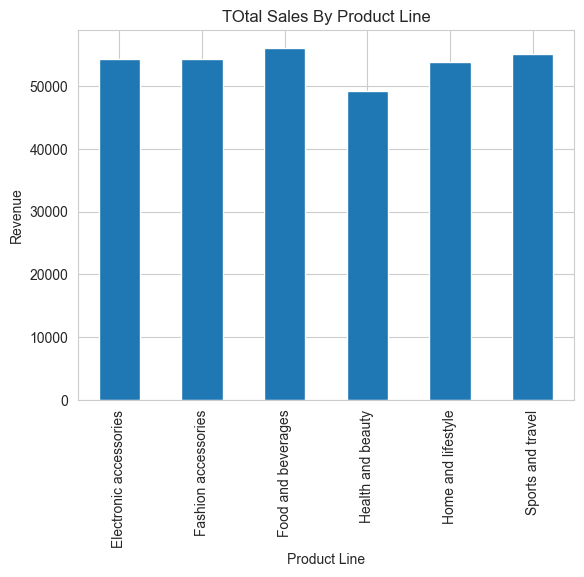

In [56]:
# Which product line generates the highest total revenue?
revenue = df.groupby('Product line')['Sales'].sum()
#print(sales)
print(revenue.idxmax())

revenue.plot(kind='bar')
plt.title('TOtal Sales By Product Line')
plt.ylabel("Revenue")
plt.xlabel("Product Line")
plt.show()

In [ ]:
# Are ratings and total purchase amount correlated?
df["Rating"].corr(df["Sales"])

## The Value is (-0.036441704997018355) ~ 0. 
# So We can Say there is no correlation between rating and total purchase amount and it means customer satisfaction does not depend on how much they spend.


np.float64(-0.036441704997018355)

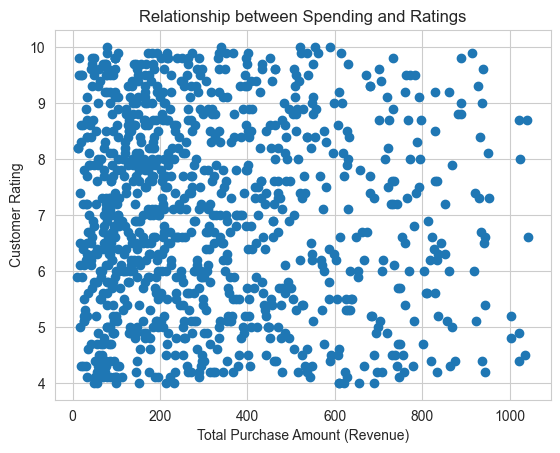

In [62]:
import matplotlib.pyplot as plt

plt.scatter(df["Sales"], df["Rating"])
plt.title("Relationship between Spending and Ratings")
plt.xlabel("Total Purchase Amount (Revenue)")
plt.ylabel("Customer Rating")
plt.show()


In [66]:
# Which city gives highest sales?
city = df.groupby('City')['Sales'].sum()
print(city)
print(city.idxmax(),city.max())

City
Mandalay     106197.6720
Naypyitaw    110568.7065
Yangon       106200.3705
Name: Sales, dtype: float64
Naypyitaw 110568.7065


C:\Users\ayand\AppData\Local\Temp\ipykernel_7640\4269056698.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  city = df.groupby('City')['Sales'].sum()


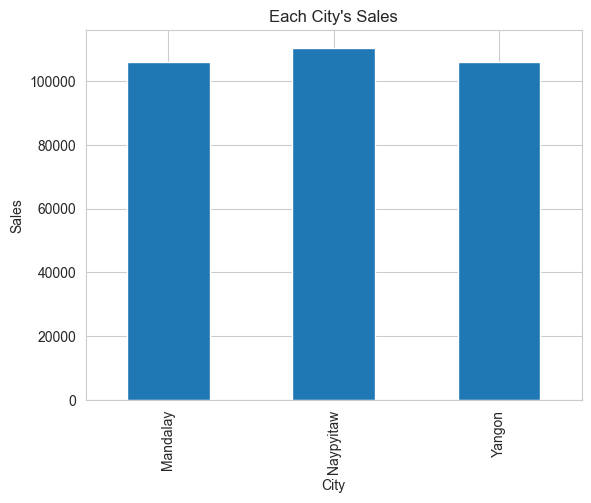

In [70]:
city.plot(kind='bar')
plt.title("Each City's Sales")
plt.ylabel('Sales')
plt.xlabel('City')
plt.show()

In [71]:
# What is the average spending per customer type?
average_spending_of_customers = df.groupby("Customer type")['Sales'].mean()
average_spending_of_customers

C:\Users\ayand\AppData\Local\Temp\ipykernel_7640\1519090562.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_spending_of_customers = df.groupby("Customer type")['Sales'].mean()


Customer type
Member    335.742945
Normal    306.372379
Name: Sales, dtype: float64

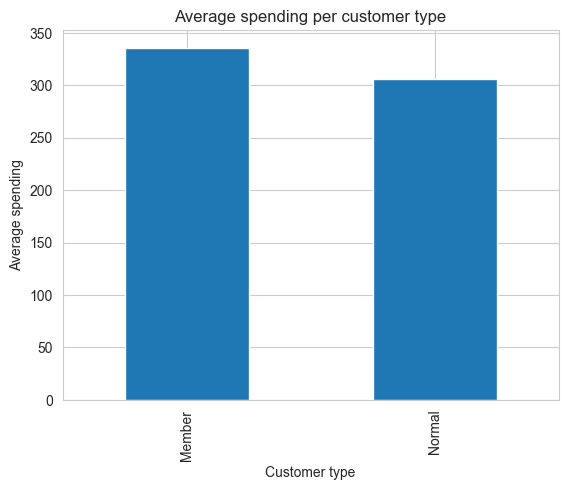

In [73]:
average_spending_of_customers.plot(kind='bar')
plt.title("Average spending per customer type")
plt.xlabel('Customer type')
plt.ylabel('Average spending')
plt.show()

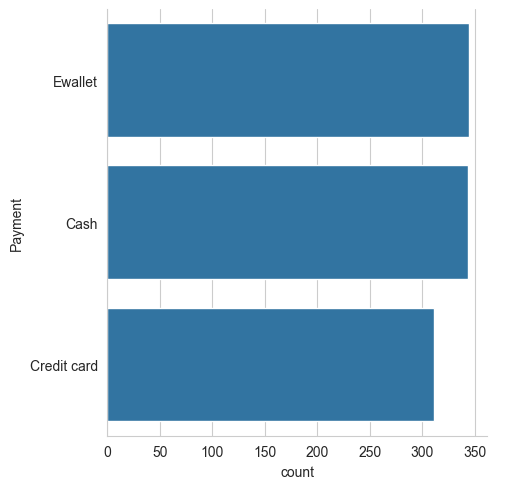

In [76]:
# What payment method is used the most?
sns.catplot(y="Payment",data=df,kind='count',order=df['Payment'].value_counts().index)
plt.show()

In [77]:
df['Payment'].value_counts()

Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64